In [1]:
#Handlae the data when data is mixed. like numeric and categorical both in a same columns.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Waris Hayyat\AppData\Local\Temp\ipykernel_8064\2660915427.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df=pd.read_csv("titanic.csv")
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


<Axes: ylabel='number'>

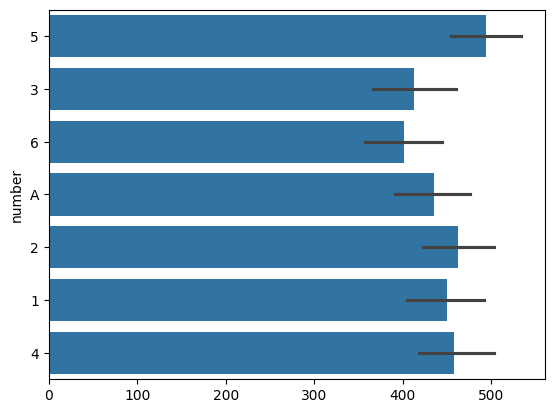

In [13]:
sns.barplot(df["number"])

In [16]:
df["numerical"]=pd.to_numeric(df["number"],errors="coerce",downcast="integer") #extraxt the integers from the table.
df.head()

,Cabin,Ticket,number,Survived,numerical
0,NaN,A/5 21171,5,0,5.0
1,C85,PC 17599,3,1,3.0
2,NaN,STON/O2. 3101282,6,1,6.0
3,C123,113803,3,1,3.0
4,NaN,373450,A,0,NaN


In [17]:
#Now extract categorical values.
df["number_cateogrical"]=np.where(df["numerical"].isnull(),df["number"],np.nan)

In [18]:
df.head()

,Cabin,Ticket,number,Survived,numerical,number_cateogrical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [20]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [28]:
df["Cabin_num"]=df["Cabin"].str.extract('(\d+)') #capture numerical part
df["cabin_cat"]=df["Cabin"].str[0]
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Waris Hayyat\AppData\Local\Temp\ipykernel_8064\2010469298.py:1: SyntaxWarning: invalid escape sequence '\d'
  df["Cabin_num"]=df["Cabin"].str.extract('(\d+)') #capture numerical part


,Cabin,Ticket,number,Survived,numerical,number_cateogrical,Cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN
...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN,NaN,NaN
887,B42,112053,3,1,3.0,NaN,42,B
888,NaN,W./C. 6607,1,0,1.0,NaN,NaN,NaN
889,C148,111369,2,1,2.0,NaN,148,C


<Axes: xlabel='cabin_cat', ylabel='count'>

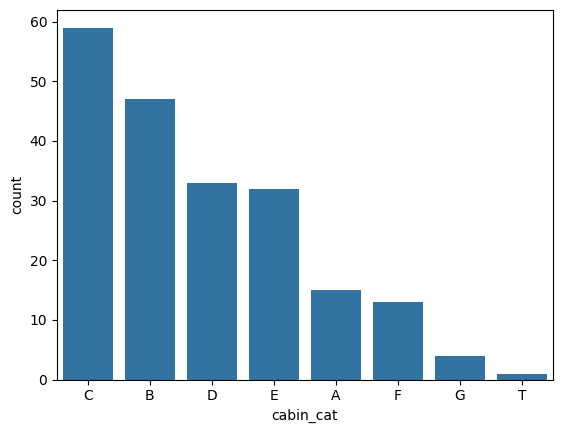

In [30]:
sns.barplot(df["cabin_cat"].value_counts())

In [39]:
df["ticket_num"]=df["Ticket"].apply(lambda s: s.split()[-1])
df["ticket_num"]=pd.to_numeric(df["ticket_num"],errors="coerce",downcast="integer")

In [43]:
df["ticket_cat"]=df["Ticket"].apply(lambda s: s.split()[0])
df["ticket_num"]=np.where(df["ticket_cat"].str.isdigit(),np.nan,df["ticket_cat"])

In [44]:
df.sample(10)

,Cabin,Ticket,number,Survived,numerical,number_cateogrical,Cabin_num,cabin_cat,ticket_num,ticket_cat
553,NaN,2620,1,1,1.0,NaN,NaN,NaN,NaN,2620
739,NaN,349218,5,0,5.0,NaN,NaN,NaN,NaN,349218
461,NaN,364506,2,0,2.0,NaN,NaN,NaN,NaN,364506
368,NaN,14313,3,1,3.0,NaN,NaN,NaN,NaN,14313
256,NaN,PC 17585,6,1,6.0,NaN,NaN,NaN,PC,PC
175,NaN,350404,A,0,NaN,A,NaN,NaN,NaN,350404
707,E24,PC 17476,5,1,5.0,NaN,24,E,PC,PC
326,NaN,345364,4,0,4.0,NaN,NaN,NaN,NaN,345364
783,NaN,W./C. 6607,4,0,4.0,NaN,NaN,NaN,W./C.,W./C.
223,NaN,349234,A,0,NaN,A,NaN,NaN,NaN,349234
